# Worksheet 06

Name:  Dayu Li
UID:  U61453443

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

The main difference between them lies in the method of initializing the cluster centers. K means ++ choose the centers by letting D(x) be the distance between x and the centers selected so far and choosing the next center with probability proportional to D(x)^a.

b) What are some limitations of K means ++?

Like K-means, K-means++ requires the number of clusters (K) to be specified in advance, which can be difficult to estimate correctly without prior knowledge of the data.
Also, K-means++ can still converge to a local minimum rather than the global minimum and it is still sensitive to the outliers.

c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

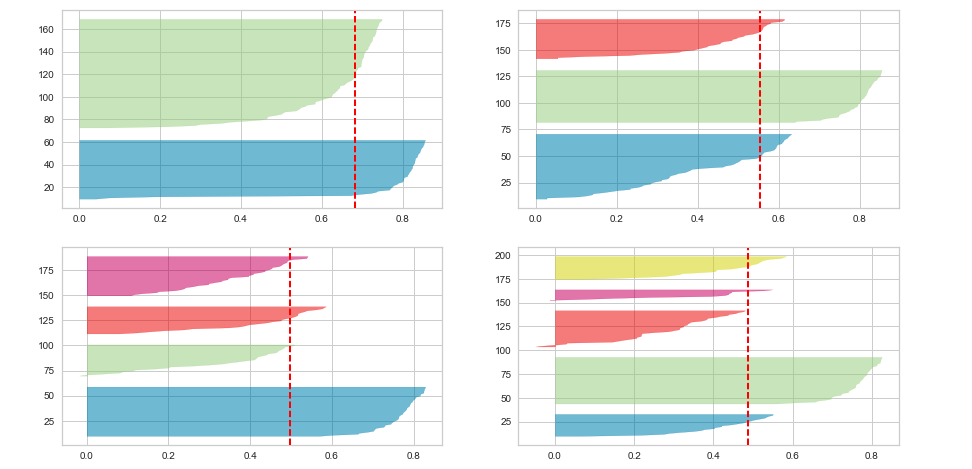

In [ ]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

Based on the silhouette plots, a choice of K=2 seems to be the best among the given options. This is because the average silhouette score is the highest at around 0.7, suggesting a good separation between the two clusters. Although the score distribution is uneven, it indicates that the clusters are mostly well-defined and cohesive. For K=3, the average score decreases to about 0.55, and the scores are more balanced across clusters, but the overall cohesion and separation are reduced. With K=4 and K=5, the average silhouette scores decrease further, and the spread within clusters increases, particularly in the yellow cluster for K=5, indicating less cohesive clusters. Therefore, despite some mixed individual scores, K=2 is preferable for its higher average silhouette score, which points to better-defined clusters. 

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |   |   |   |   |
| B |   | 0 |   |   |   |
| C |   |   | 0 |   |   |
| D |   |   |   | 0 |   |
| E |   |   |   |   | 0 |

Step 2

|   |   |   |   |   |
|---|---|---|---|---|
|   | 0 |   |   |   |
|   |   | 0 |   |   |
|   |   |   | 0 |   |
|   |   |   |   | 0 |

Step 3

|   |   |   |   |
|---|---|---|---|
|   | 0 |   |   |
|   |   | 0 |   |
|   |   |   | 0 |

Step 4

|   |   |   |
|---|---|---|
|   | 0 |   |
|   |   | 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |   |   |   |   |
| B |   | 0 |   |   |   |
| C |   |   | 0 |   |   |
| D |   |   |   | 0 |   |
| E |   |   |   |   | 0 |

Step 2

|   |   |   |   |   |
|---|---|---|---|---|
|   | 0 |   |   |   |
|   |   | 0 |   |   |
|   |   |   | 0 |   |
|   |   |   |   | 0 |

Step 3

|   |   |   |   |
|---|---|---|---|
|   | 0 |   |   |
|   |   | 0 |   |
|   |   |   | 0 |

Step 4

|   |   |   |
|---|---|---|
|   | 0 |   |
|   |   | 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

In [2]:
sequences = [
 'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

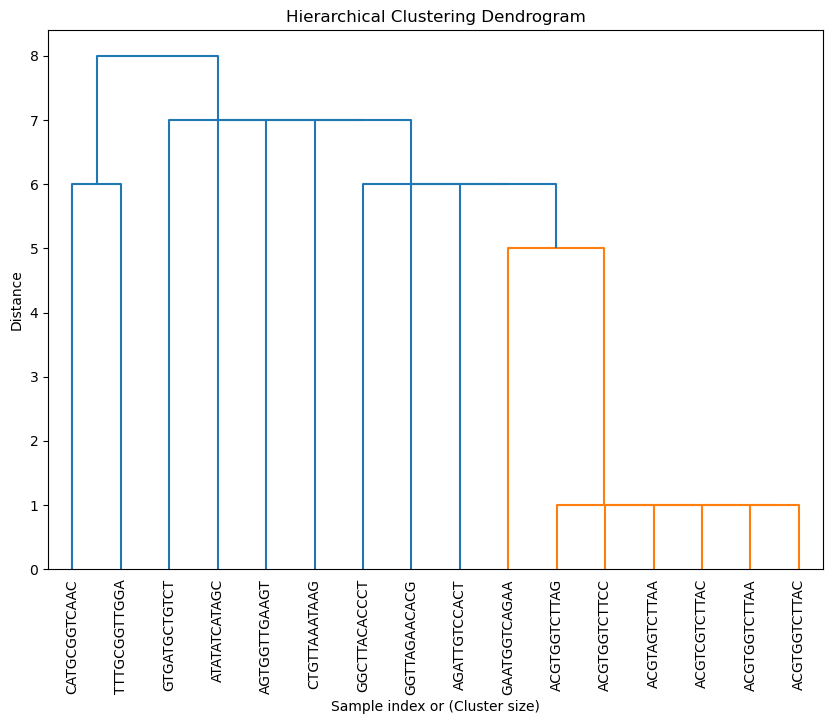

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

# Calculate Hamming distance between all pairs of sequences
def hamming_distance(str1, str2):
    return sum(c1 != c2 for c1, c2 in zip(str1, str2))

distance_matrix = [[hamming_distance(seq1, seq2) for seq2 in sequences] for seq1 in sequences]

# Convert the distances to a 2D square matrix form and create a linkage matrix
square_distance_matrix = squareform(distance_matrix)
linkage_matrix = linkage(square_distance_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=sequences, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (Cluster size)')
plt.ylabel('Distance')
plt.show()